<h1>Analisa Penjualan 

<p>Data penjualan pada toko ## berisi transaksi dari tahun 2019 dengan jumlah<br>transaksi 1000 . Mari kita Analisa bagaimana tend penjualan dari toko terebut

<h1>Import Libraries

In [ ]:
#--- Import Library ----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
#--- read dataset ----
data_penjualan=pd.read_csv('https://raw.githubusercontent.com/RakaMurdiarta/mycoding/main/Data%20Penjualan%20Supermarket%20X%20(Final%20Project%20I).csv')
df=data_penjualan.copy()

#Examining Data

sebelum masuk ke proses analisa , kita harus memeriksa data sebelum dilakukan proses analisa lebih dalam. Data yang di gunakan terlebih dahulu melalui proses pemeriksaan dengan tujuan data yang di olah sudah sesuai dan tepat. Dalam proses ini kita juga dapat melihat secara umum isi data dan struktur data tersebut. 

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3


In [ ]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,2/18/2019,13:28,Cash,6.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [ ]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.size

12000

In [ ]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

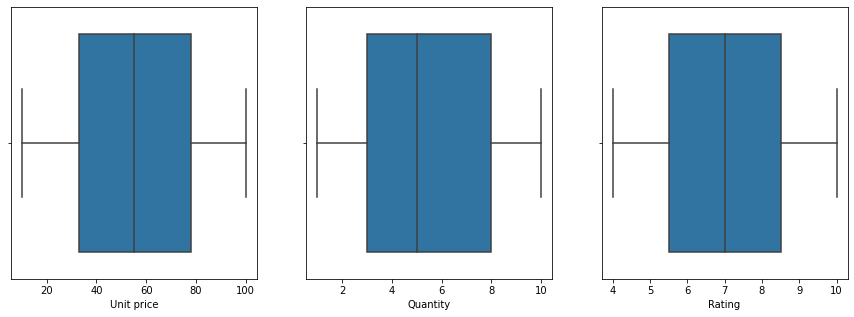

In [ ]:
# memeriksa outlier
data=['Unit price','Quantity','Rating']
plt.figure(figsize=(15,5))

for i,isi in enumerate(data,1):
  fig=plt.subplot(1,3,i)
  ax=sns.boxplot(x=isi,data=df)

Tidak Ada nilai outlier dari kolom Unit price, Quantity dan Rating. Dari chart ini juga kita bisa melihat sebaran data dari masing2 kolom

# Data Preparation

Pada Tahap ini kita sudah mulai mempersiapkan data sesuai kebutuhan dengan melakukan penambahan data, perubahan data dan menyesuaikan dengan struktur data yang tepat untuk mendukung proses analisa nanti

In [ ]:
df.loc[:,'Date'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time.astype(str))

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05 13:08:00,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08 10:29:00,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03 13:23:00,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27 20:33:00,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08 10:37:00,10:37,Ewallet,5.3


In [ ]:
df=df.drop(columns='Time')

In [ ]:
df=df.rename(columns={
    'Date':'Date Time'
})
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05 13:08:00,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08 10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03 13:23:00,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27 20:33:00,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29 13:46:00,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02 17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09 13:22:00,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22 15:33:00,Cash,4.1


In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05 13:08:00,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08 10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03 13:23:00,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27 20:33:00,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29 13:46:00,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02 17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09 13:22:00,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22 15:33:00,Cash,4.1


In [ ]:
df['Total']=df['Unit price']*df['Quantity']
df['Tax']=df['Total']*0.05
df['Profit']=df['Total']-df['Tax']
df['Profit Ratio']=df['Profit']/df['Total']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date Time,Payment,Rating,Total,Tax,Profit,Profit Ratio
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05 13:08:00,Ewallet,9.1,522.83,26.1415,496.6885,0.95
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08 10:29:00,Cash,9.6,76.40,3.8200,72.5800,0.95
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03 13:23:00,Credit card,7.4,324.31,16.2155,308.0945,0.95
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27 20:33:00,Ewallet,8.4,465.76,23.2880,442.4720,0.95
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08 10:37:00,Ewallet,5.3,604.17,30.2085,573.9615,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29 13:46:00,Ewallet,6.2,40.35,2.0175,38.3325,0.95
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02 17:16:00,Ewallet,4.4,973.80,48.6900,925.1100,0.95
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09 13:22:00,Cash,7.7,31.84,1.5920,30.2480,0.95
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22 15:33:00,Cash,4.1,65.82,3.2910,62.5290,0.95


# Data Manipulation dan Exploratory Data Analysis

Pada Tahap ini kita akan mulai analisa data secara umum, dengan bantuan diagram chart sebagai visualisasi guna mempermudah penyampaian informasi yang terkandung di dalamnya




### Produk yang paling banyak terjual dan berapa jumlah yang terjual dari masing masing produk

In [ ]:
produk=df.groupby('Product line',as_index=False).Quantity.sum()
produk

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


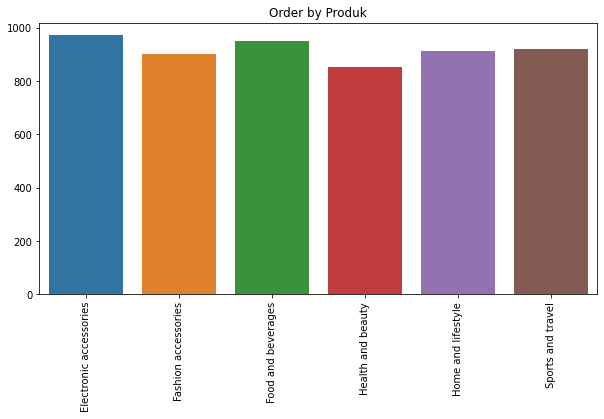

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product line',y='Quantity',data=produk)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.title('Order by Produk')
plt.show()

Summary : Order dengan product line electronic accessories menjadi order terbanyak dengan 971 total order diikuti dengan Food and beverages dengan total order 952. Namun tidak terlihat perbedaan yang signifikan dari product line yang lainnya , rata2 mencapai 900 order.

###Berapa Presentase Tipe Pembeli dari Masing masing Kategori

In [ ]:
## Fiter Data Berdasarkan tipe Konsumen
normal=df.loc[df['Customer type']=='Normal']
member=df.loc[df['Customer type']=='Member']

In [ ]:
type_normal=normal.groupby('Product line',as_index=False)['Customer type'].count()
type_member=member.groupby('Product line',as_index=False)['Customer type'].count()

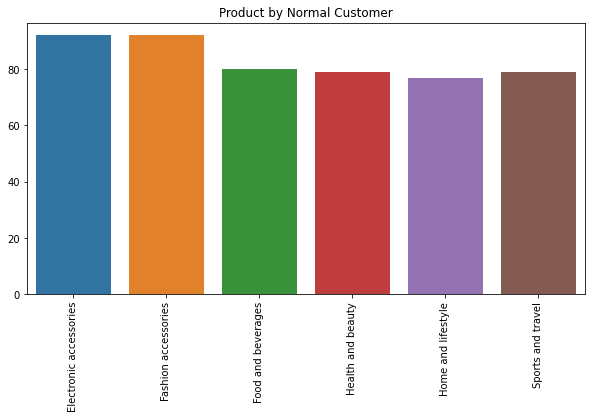

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Product line',y='Customer type',data=type_normal,dodge=True)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('')
plt.title('Product by Normal Customer')
plt.show()

Summary : Untuk customer dengan tipe Normal , product line dengan order terbanyak adalah Electronic accessories dan Fashion accessories, sementara yang lain memiliki rata penjualan yang seimbang

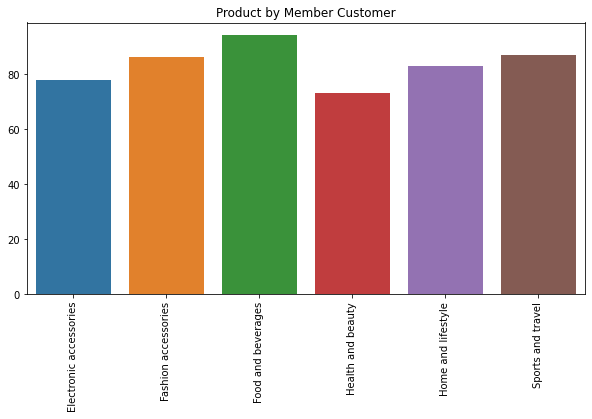

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product line',y='Customer type',data=type_member)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('')
plt.title('Product by Member Customer')
plt.show()

Summary : Untuk customer dengan tipe Member , product line dengan order terbanyak adalah Food and beverages dan Fashion accessories, sementara yang memiliki order terendah yaitu Health and Beatuy

## Tipe Pembayaran yang sering digunakan Pembeli

In [ ]:
payment=df.groupby('Payment',as_index=False)['Invoice ID'].count()

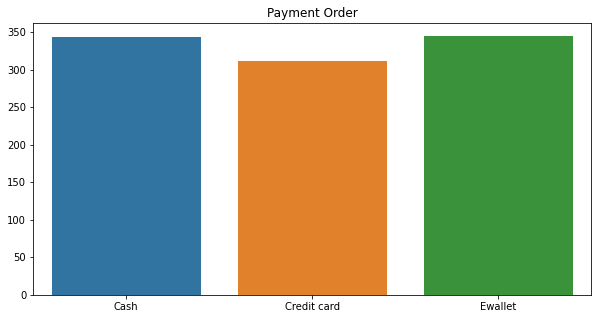

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Payment',y='Invoice ID',data=payment)
plt.xlabel('')
plt.ylabel('')
plt.title('Payment Order')
plt.show()

Summary : Tipe pembayaran Cash menjadi paling favorit yang sering digunakan oleh cutomer setiap ordernya diikuti dengan e-wallet yang tidak terlalu signifikan pebedaaya. Penggunaan Credit card menjadi yang terendah

## Dari Masing masing kategoris , berapa presentase jenis pembayaran yang digunakan

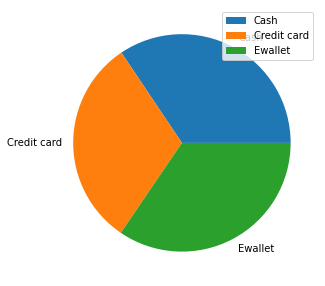

In [ ]:
plt.figure(figsize=(10,5))
pi_chart=df.groupby('Payment')['Product line'].count().plot(kind='pie', y='Product line',legend=True)
plt.ylabel('')
plt.show()

Summary : Tipe pembayaran Cash menjadi paling favorit yang sering digunakan oleh cutomer setiap ordernya diikuti dengan e-wallet yang tidak terlalu signifikan pebedaaya. Penggunaan Credit card menjadi yang terendah

## Keuntungan Supermarket dari masing masing kategori

In [ ]:
profit_kategoris=df.groupby('Product line',as_index=False).Profit.sum()
profit_kategoris

,Product line,Profit
0,Electronic accessories,49162.5285
1,Fashion accessories,49133.9050
2,Food and beverages,50797.7160
3,Health and beauty,44508.6210
4,Home and lifestyle,48732.2070
5,Sports and travel,49873.0335


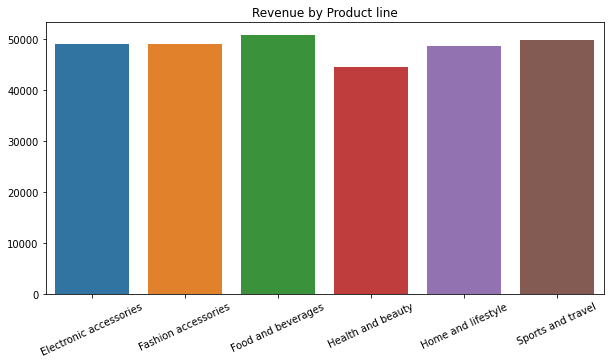

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product line',y='Profit',data=profit_kategoris)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=25)
plt.title('Profit by Product line')
plt.show()

Summary : Total Profit yang dihasilkan oleh setiap produk line, dimana Foof and beverages menjadi top 1 dengan Profit tertinggi  $50797.72 sementara untuk yang lain tidak terlalu signifikan perbedaanya